In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

**Dataset link:** https://www.kaggle.com/datasets/prevek18/ames-housing-dataset 

In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\mon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prevek18/ames-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\mon\.cache\kagglehub\datasets\prevek18\ames-housing-dataset\versions\1


In [5]:
# Load the dataset
data = path 
data = pd.read_csv('C:/Users/mon/.cache/kagglehub/datasets/prevek18/ames-housing-dataset/versions/1/AmesHousing.csv')
data.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [6]:
# Prepare features and target variable
X = data[['Gr Liv Area', 'Bedroom AbvGr', 'Neighborhood']]
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)
y = data['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1820530495.609366


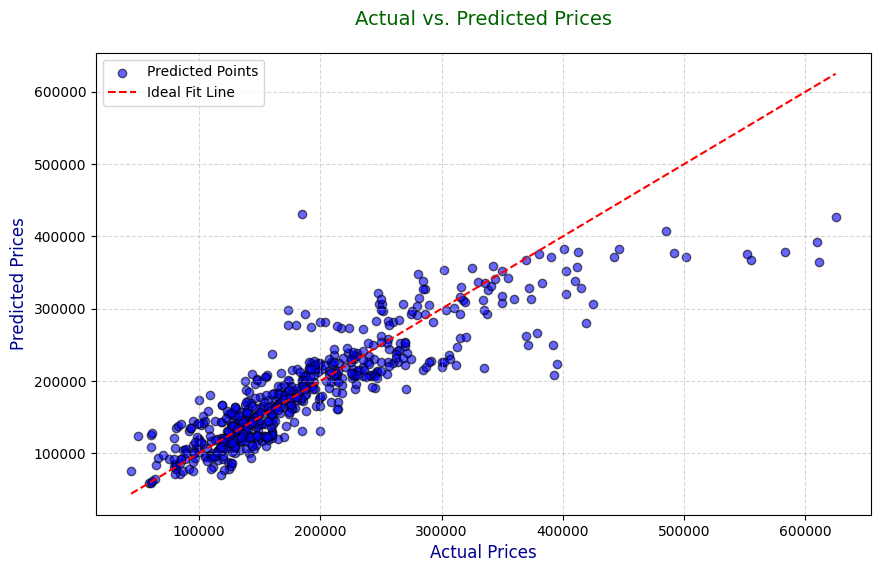

In [ ]:
# Visualize results
plt.figure(figsize=(10, 6)) 
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolors='k', label='Predicted Points')  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit Line')
plt.xlabel('Actual Prices', fontsize=12, color='darkblue')  
plt.ylabel('Predicted Prices', fontsize=12, color='darkblue')
plt.title('Actual vs. Predicted Prices', fontsize=14, color='darkgreen', pad=20)  
plt.legend(fontsize=10) 
plt.grid(True, linestyle='--', alpha=0.5)  
plt.show()